# Informe Template
-introduccion -> hipotesis

-materiales

-metodos/resultados -> experimentos

-conclusiones

-referencias

<div style="text-align: center">
 <h1><span style="color: red">TPE Fundamentos</span> </h1>
</div>

### Grupo numero 1

Integrantes:
- Dimuro, Agustin Nicolas
- Grillo, Agustin German
- Padilla, Tomas Agustin

---


<div style="text-align: center"> 
    <h2> Analisis descriptivo de las columnas </h2>
</div>

**Track:** el título de la canción.  
**Artist:** el intérprete o grupo que grabó la canción.  
**Duration:** la duración de la canción, medida en minutos y segundos.  
**Time_Signature:** la métrica musical de la canción, indica el número de pulsaciones por compás.  
**Danceability:** una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.  
**Energy:** una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.  
**Key:** la tonalidad musical en la que está compuesta la canción, representada por un número entero.  
**Loudness:** el volumen promedio de la canción, medido en decibelios (dB).  
**Mode:** la modalidad de la pista, indica si la canción está en tono mayor o menor.  
**Speechiness:** una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.  
**Acousticness:** una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.  
**Instrumentalness:** una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.  
**Liveness:** una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.  
**Valence:** Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.  
**Tempo:** la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).  
**Popularity:** una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.  
**Year:** el año en que se lanzó la canción.  

In [1]:
import pandas as pd

df = pd.read_csv("Covers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

---

<div style= "text-align: center">
    <h2> Generacion del primer Profile Report </h2>
</div>

In [2]:
import ydata_profiling as pp

report = pp.ProfileReport(df)
# report.to_notebook_iframe()
# report.to_file(output_file="covers.html")

---

<div style= "text-align: center">
    <h2> Analisis y preprocesamiento de cada variable</h2>
</div>

Como primer paso creamos una copia del dataset original, a la cual le vamos a aplicar todas las transformaciones necesarias de aqui en adelante con el objetivo de seguir manteniendo el original.

In [3]:
ds_copy=df.copy()

**Duration:** la duración de la canción, medida en minutos y segundos.  
A continuación, para facilitarnos el posible análisis a futuro de esta columna, decidimos pasar todos los valores de ella a segundos y representarlos en int.

In [4]:
import re

def convertir_a_segundos(duracion):
    minutos, segundos = duracion.split(":")
    return int(minutos) * 60 + int(segundos)

ds_copy["Duration"]=ds_copy["Duration"].apply(convertir_a_segundos)

**Time_Signature:** la métrica musical de la canción, indica el número de pulsaciones por compás.  
Valores unicos de la columna Time_signature  

In [5]:
df["Time_Signature"].value_counts()

Time_Signature
4    924
3     51
1      3
5      2
Name: count, dtype: int64

**Danceability:** una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.  
Valores unicos de la columna Danceability   

In [6]:
df["Danceability"].value_counts()

Danceability
0.637    9
0.680    7
0.665    7
0.649    6
0.639    6
        ..
0.792    1
0.798    1
0.717    1
0.759    1
0.452    1
Name: count, Length: 494, dtype: int64

**Energy:** una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.  
Valores unicos de la columna Energy   
<span style= "color: red"> A simple vista todos los valores parecen validos </span>

In [7]:
df["Energy"].value_counts()

Energy
0.673    7
0.528    7
0.641    6
0.644    6
0.532    5
        ..
0.374    1
0.903    1
0.535    1
0.277    1
0.777    1
Name: count, Length: 543, dtype: int64

**Key:** la tonalidad musical en la que está compuesta la canción, representada por un número entero.  
Valores unicos de la columna Key

In [8]:
df["Key"].value_counts()

Key
0     140
7     121
9     116
2     101
5      95
4      81
1      74
11     65
10     64
8      52
6      46
3      25
Name: count, dtype: int64

**Loudness:** el volumen promedio de la canción, medido en decibelios (dB).  
Valores unicos de la columna Loudness  
Parece a simple vista no haber un falso nulo  
<span style="color: red;">Le eliminamos los numeros despues de la coma ya que asi se suele mostrar en todas las paginas web que hemos visto</span>  

In [9]:
df["Loudness"].value_counts()

Loudness
-12.472    3
-4.653     2
-12.264    2
-7.246     2
-12.923    2
          ..
-9.885     1
-9.283     1
-9.711     1
-11.367    1
-8.339     1
Name: count, Length: 916, dtype: int64

In [10]:
ds_copy["Loudness"] = ds_copy["Loudness"].astype(int)
ds_copy["Loudness"].value_counts()

Loudness
-9     114
-7      98
-8      98
-6      93
-10     92
-12     84
-11     73
-13     69
-5      64
-4      53
-14     48
-15     28
-3      18
-16     14
-17      9
-19      6
-2       5
-18      3
-20      3
-21      2
-27      2
-31      1
-30      1
-26      1
-23      1
Name: count, dtype: int64

**Mode:** la modalidad de la pista, indica si la canción está en tono mayor o menor.  
Valores unicos de la columna Mode  
<span style= "color: red">No tiene valores extraños </span>

In [11]:
df["Mode"].value_counts()

Mode
1    745
0    235
Name: count, dtype: int64

**Speechiness:** una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.  
Valores unicos de la columna Speechiness   
<span style= "color: red">No parece haber valores nulos en un principio </span>

In [12]:
df["Speechiness"].value_counts()

Speechiness
0.0336    9
0.0346    9
0.0341    8
0.0283    8
0.0287    8
         ..
0.0455    1
0.0281    1
0.0390    1
0.0460    1
0.0531    1
Name: count, Length: 455, dtype: int64

**Acousticness:** una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.  
Valores unicos de la columna Acousticness   
<span style= "color: red">No parece tener valores nulos escondidos </span>

In [13]:
df["Acousticness"].value_counts()

Acousticness
0.35700    8
0.30500    5
0.48400    5
0.30900    5
0.18100    5
          ..
0.05020    1
0.00115    1
0.48500    1
0.79200    1
0.57100    1
Name: count, Length: 718, dtype: int64

**Instrumentalness:** una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.   
Valores unicos de la columna Instrumentalness     
<span style="color: red;">no entendemos esta variable del todo</span>  


In [14]:
df["Instrumentalness"].value_counts()

Instrumentalness
0.000000    285
0.000002      4
0.000122      4
0.001410      3
0.000310      3
           ... 
0.009440      1
0.001240      1
0.000009      1
0.006820      1
0.218000      1
Name: count, Length: 614, dtype: int64

**Liveness:** una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.  
Valores unicos de la columna Liveness  
<span style= "color: red"> Parecen valores correctos </span>

In [15]:
df["Liveness"].value_counts()

Liveness
0.1050    12
0.1080    11
0.1130    10
0.1030    10
0.1200     9
          ..
0.1620     1
0.3480     1
0.0837     1
0.6430     1
0.0521     1
Name: count, Length: 531, dtype: int64

**Valence:** Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.  
Valores unicos de la columna Valence  
<span style="color: red">Parecen valores correctos </span>

In [16]:
df["Valence"].value_counts()

Valence
0.962    9
0.963    8
0.971    6
0.969    6
0.967    5
        ..
0.208    1
0.316    1
0.346    1
0.686    1
0.238    1
Name: count, Length: 570, dtype: int64

**Tempo:** la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).  
Valores unicos de la columna Tempo  
<span style="color: red;">Eliminamos los numeros despues de la coma en cada fila ya que encontramos que siempre se muestra el tempo con numeros enteros</span>  


In [17]:
df["Tempo"].value_counts()

Tempo
102.977    3
130.166    2
120.157    2
85.126     2
79.764     2
          ..
113.245    1
90.955     1
110.656    1
137.702    1
115.058    1
Name: count, Length: 955, dtype: int64

In [18]:
ds_copy["Tempo"] = ds_copy["Tempo"].astype(int)
ds_copy["Tempo"].value_counts()

Tempo
109    23
113    21
120    19
114    18
101    17
       ..
183     1
178     1
211     1
67      1
61      1
Name: count, Length: 128, dtype: int64

**Popularity:** una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.  
Valores unicos de la columna Popularity  
   
<span style="color: red;">Encontramos la siguiente explicacion de la columna ya que nos resultaba extraña </span>     
popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
    
sacado de un dataset de spotify de kagle tiene sentido 

In [19]:
df["Popularity"].value_counts()

Popularity
63    31
64    31
55    30
49    26
74    26
      ..
9      2
8      1
89     1
21     1
3      1
Name: count, Length: 87, dtype: int64

In [20]:
ds_popu = ds_copy.copy()
ds_popu = ds_popu.sort_values(by = "Popularity", ascending=False)
ds_popu

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
881,Stumblin’ In,Suzi Quatro & Chris Norman,213,4,0.875,0.518,2,-8,1,0.0551,0.0638,0.009950,0.1250,0.370,126,90,1979
283,Wildflower,Skylark,261,4,0.467,0.247,6,-12,0,0.0431,0.6120,0.000271,0.1700,0.126,148,90,1973
284,My Love,Paul McCartney & Wings,137,4,0.504,0.308,9,-14,1,0.0321,0.8680,0.135000,0.1580,0.121,113,89,1973
383,Mockingbird,Carly Simon & James Taylor,250,4,0.637,0.678,0,-3,1,0.2660,0.2090,0.000000,0.1560,0.254,84,86,1974
681,Dreams,Fleetwood Mac,257,4,0.828,0.492,0,-9,1,0.0276,0.0644,0.004280,0.1280,0.789,120,86,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Sentimental Lady,Bob Welch,275,4,0.539,0.396,4,-16,1,0.0378,0.7770,0.000118,0.1460,0.621,75,0,1978
880,This Time I’m In It For Love,Player,116,4,0.965,0.427,8,-19,1,0.1050,0.8830,0.905000,0.1050,0.966,139,0,1978
184,Have You Ever Seen The Rain / Hey Tonight,Creedence Clearwater Revival,158,4,0.735,0.556,0,-5,1,0.0276,0.1170,0.000000,0.0738,0.877,127,0,1971
185,I’ve Found Someone Of My Own,The Free Movement,214,3,0.676,0.334,7,-14,1,0.0526,0.8030,0.479000,0.1580,0.776,112,0,1971


In [21]:
#ds_copy["Popularity"] = ds_copy["Popularity"].replace(0,pd.NA)
ds_copy["Popularity"] = ds_copy["Popularity"].astype(int)

---

<div style= "text-align: center">
    <h2> Planteo de hipotesis </h2>
</div>

- Las canciones en la primer mitad de decada son significativamente distintas a las de la segunda mitad. Es decir que no se mantuvo un estilo marcado. (Energy, Acousticness, Tempo y/o Loudness)
- Hay canciones que envejecieron mejor con respecto a otras gracias a su time_signature (hacer un anova separando por time_signature y hacer un analisis y como variable de respuesta la popularidad).
- Las canciones que más positivas y alegres son más populares hoy en día.
- Las canciones más propensas a ser bailadas son, a su vez, las más instrumentales. 
- Las canciones más habladas son menos instrumentales.
- Las grabaciones en vivo son más enérgicas.
- Las canciones que son más instrumentales también son las que más duran.
---


<div style="text-align: center">
    <h2>Analisis de las hipotesis</h2>
</div>

In [22]:
import numpy as np

variable1 = "Acousticness"
variable2 = "Energy"

datosColumna1 = ds_copy[variable1]
datosColumna2 = ds_copy[variable2]

coeficiente_correlacion = np.corrcoef(datosColumna1, datosColumna2)[0, 1]

print(f"Correlación entre {variable1} y {variable2}: {coeficiente_correlacion:.4f}")

Correlación entre Acousticness y Energy: -0.6026


La correlacion entre acousticness y energy no es muy alta, ya que tiene como valor absoluto 0.60 cuando para ser correlacion alta deberia ser 0.7, pero la tenemos en cuenta igual para el analisis porque no esta tan lejos de 0.7 y no hay por ahora correlaciones mas altas que esta.

In [23]:
import numpy as np

variable1 = "Danceability"
variable2 = "Valence"

datosColumna1 = ds_copy[variable1]
datosColumna2 = ds_copy[variable2]

coeficiente_correlacion = np.corrcoef(datosColumna1, datosColumna2)[0, 1]

print(f"Correlación entre {variable1} y {variable2}: {coeficiente_correlacion:.4f}")

Correlación entre Danceability y Valence: 0.5431


Como podemos ver esta correlacion es aun mas baja que la anterior por lo que no podemos decir nada sobre que esta relacion no es lo suficientemente fuerte como para analizarla detenidamente.

In [24]:
import numpy as np

variable1 = "Loudness"
variable2 = "Energy"

datosColumna1 = ds_copy[variable1]
datosColumna2 = ds_copy[variable2]

coeficiente_correlacion = np.corrcoef(datosColumna1, datosColumna2)[0, 1]

print(f"Correlación entre {variable1} y {variable2}: {coeficiente_correlacion:.4f}")

Correlación entre Loudness y Energy: 0.6688


Como se puede observar esta relacion es la que resulta que tiene un indice de correlacion mas alto de todo el dataset, ademas de que esta suficientemente cerca del 0.7 como para que podamos decir y demostrar que esta correlacion es alta.

---

<div style="text-align: center">
    <h2>Profile Report post preprocesamiento</h2>
</div>

In [25]:
ds_copy["Loudness"].value_counts()

Loudness
-9     114
-7      98
-8      98
-6      93
-10     92
-12     84
-11     73
-13     69
-5      64
-4      53
-14     48
-15     28
-3      18
-16     14
-17      9
-19      6
-2       5
-18      3
-20      3
-21      2
-27      2
-31      1
-30      1
-26      1
-23      1
Name: count, dtype: int64

In [26]:
report = pp.ProfileReport(ds_copy)
# report.to_notebook_iframe()
# report.to_file(output_file="coversCopy.html")

# Normalizacion de los datos 

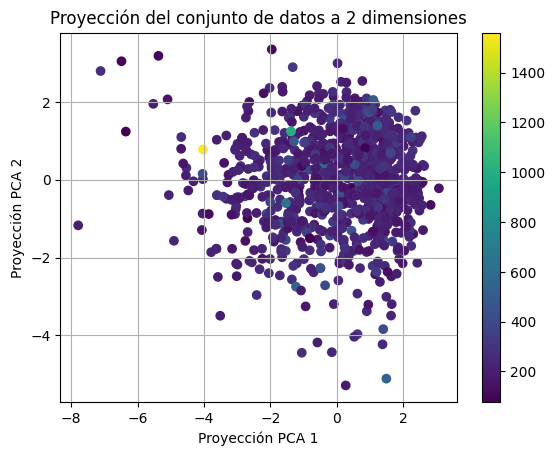

array([0.20756715, 0.1128229 ])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

ds_filtred=ds_copy.copy()
ds_filtred.drop(["Track", "Artist"], axis=1, inplace=True)
#ds_filtred.info()


scaler = StandardScaler()
ds_filtred = ds_filtred.drop("Year", axis=1)
ds_scaled_reducible = ds_filtred.copy()

ds_scaled_reducible  = ds_scaled_reducible.drop("Duration", axis=1)

ds_scaled = scaler.fit_transform(ds_scaled_reducible)



#print(np.std(ds_scaled, axis=0))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(ds_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1], c=ds_filtred["Duration"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
# %matplotlib inline
plt.colorbar()
plt.show()


pca.explained_variance_ratio_

Como la varianza explicada usando PCA nos dio tan baja con dos dimensiones, podemos pensar que o no tienen relaciones lineales o los datos estan muy dispersos.

Before t-SNE: (980, 13)
After t-SNE: (980, 2)


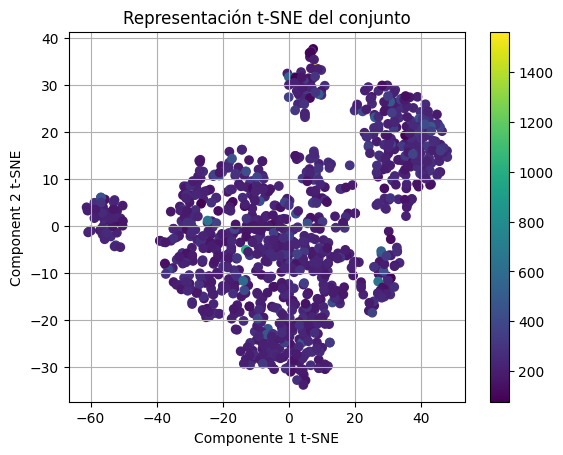

In [28]:

from sklearn.manifold import TSNE


ds_tsne = TSNE(n_components=2, random_state=42).fit_transform(ds_scaled)  

print('Before t-SNE: {}'.format(ds_scaled.shape))
print('After t-SNE: {}'.format(ds_tsne.shape))


plt.scatter(ds_tsne[:,0], ds_tsne[:,1], c=ds_copy["Duration"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

mirarlo con mas ganas dado q literalmente cuadno hicimos esto somos tone y dimu nada mas en el aula xd

Antes de UMAP: (980, 13)
Después de UMAP: (980, 2)


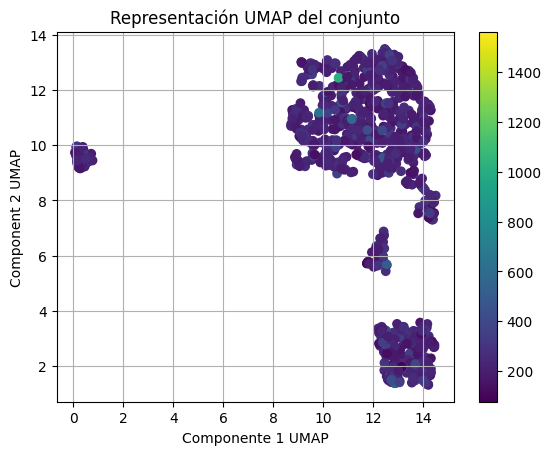

In [29]:
# importamos umap
import umap

ds_umap = umap.UMAP(n_components=2).fit_transform(ds_scaled)

print('Antes de UMAP: {}'.format(ds_scaled.shape))
print('Después de UMAP: {}'.format(ds_umap.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(ds_umap[:,0], ds_umap[:,1], c=ds_copy["Duration"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

In [30]:
from sklearn.cluster import KMeans

ds_precluster = ds_filtred.copy()
scaler = StandardScaler()
ds_precluster = scaler.fit_transform(ds_precluster)

# separamos las features de los nombres de los países
songs = ds_copy['Track'].copy()

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=9, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides

kmeans.fit(ds_precluster)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(ds_precluster)
print(clusters_kmeans)

[1 3 5 6 1 1 1 0 3 5 3 1 1 1 1 3 6 3 4 3 1 1 3 5 6 5 1 7 3 6 7 6 4 5 1 6 1
 3 4 5 6 4 3 0 3 3 5 5 1 2 6 3 5 2 5 3 1 3 4 6 5 3 3 4 3 5 5 1 5 3 6 4 1 1
 4 5 5 3 3 3 4 4 4 5 0 2 2 8 8 2 1 3 6 6 3 3 4 3 5 7 4 3 3 8 5 1 6 6 3 1 6
 1 0 1 6 3 5 3 1 3 3 3 5 3 6 1 6 3 5 6 4 4 5 6 6 6 6 8 5 3 1 0 6 7 4 4 6 7
 4 3 5 7 6 6 0 6 3 2 6 0 6 6 6 6 5 3 6 4 6 5 3 7 3 3 5 6 0 6 7 5 4 8 6 3 6
 0 5 3 4 1 1 4 4 4 5 4 6 1 6 3 6 1 1 3 6 4 0 2 5 3 3 4 6 1 4 8 1 1 4 6 1 5
 3 4 1 2 3 3 7 3 2 2 3 5 5 3 5 4 3 6 5 1 6 7 5 3 1 0 2 7 0 7 5 3 6 7 5 3 5
 4 6 3 4 5 4 6 5 6 6 6 5 7 6 3 3 8 7 5 3 6 5 3 3 3 3 6 1 5 2 5 4 5 4 6 5 4
 1 6 1 6 4 1 4 3 5 6 5 4 5 2 5 5 3 6 5 6 8 0 4 8 4 4 5 3 2 3 1 1 6 5 6 6 4
 4 3 5 0 7 4 4 6 4 8 1 1 8 4 7 7 0 8 6 1 1 6 4 6 5 5 4 4 5 6 3 6 5 6 4 0 6
 5 4 2 6 6 6 5 4 6 8 4 8 4 7 4 5 5 4 3 0 1 5 0 6 7 3 0 1 3 0 6 0 1 5 4 1 3
 7 3 5 2 4 3 5 4 6 6 5 0 3 3 5 1 1 3 6 4 4 1 6 5 3 2 1 6 2 1 2 6 6 5 2 8 5
 1 4 8 3 6 8 5 6 6 3 6 5 4 5 5 2 5 3 0 5 3 5 0 2 5 4 4 3 5 6 5 6 4 6 5 2 2
 3 1 3 7 3 6 5 1 3 5 5 4 

In [31]:

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Track': songs, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(9):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist())


Cluster 0:
['The House Of The Rising Sun', 'Hey There Lonely Girl', 'I’ll Never Fall In Love Again', 'How Can You Mend A Broken Heart', 'Mr. Bojangles', 'For The Good Times', 'One Less Bell To Answer', 'Don’t Pull Your Love', 'I’ve Found Someone Of My Own', 'Morning Has Broken', 'Hurting Each Other', 'The Happiest Girl In The Whole U.S.A.', 'Me And Mrs. Jones', 'Natural High', 'Break Up To Make Up', 'Funny Face', 'Time In A Bottle', 'Beach Baby', 'Annie’s Song', 'On And On', 'Rock On', 'The Way We Were', 'One Hell Of A Woman', 'Love’s Theme', 'Lucy In The Sky With Diamonds', 'You Are So Beautiful', 'Love Won’t Let Me Wait', 'Cat’s In The Cradle', 'Sara Smile', 'Take It To The Limit', 'Fooled Around And Fell In Love', 'Misty Blue', 'Just To Be Close To You', 'Deep Purple', 'You And Me', 'On And On', 'Somebody To Love', 'Lucille', 'You Light Up My Life', 'When I Need You', 'Weekend In New England', 'After The Lovin’', 'I’ve Got Love On My Mind', 'Tonight’s The Night (GONNA Be Alright)',

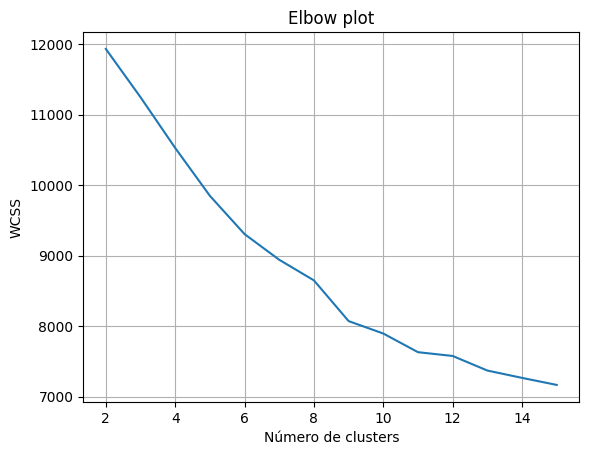

In [32]:
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(ds_precluster)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 16), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

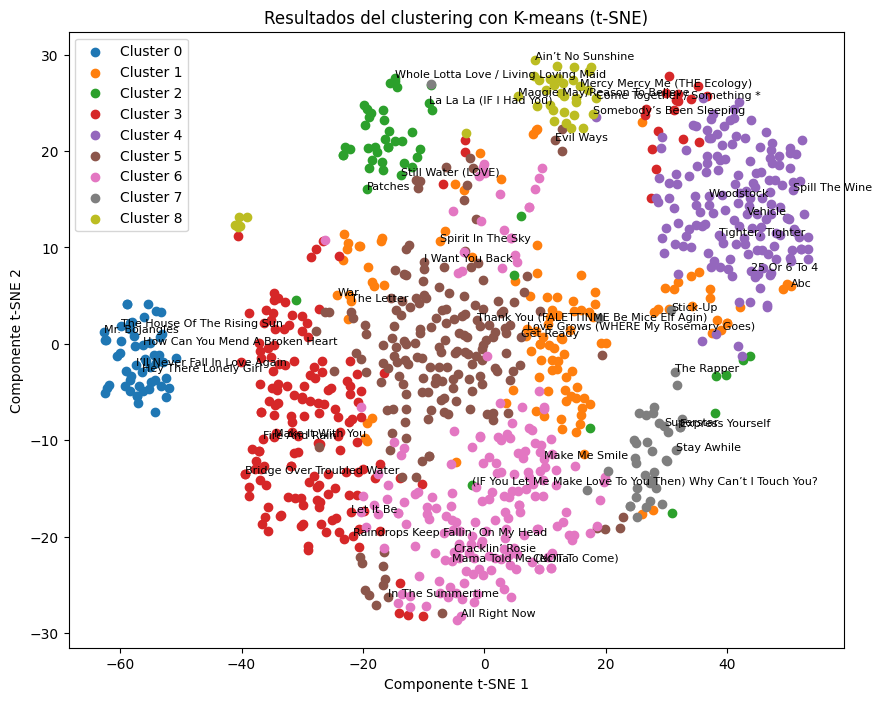

In [33]:
# Reducir la dimensionalidad de los datos usando t-SNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(ds_precluster)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Track': songs})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(9):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')


  songs_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Track'].tolist()
  songs_to_label = songs_to_label[:5]

  for songs in songs_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Track'] == songs)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], songs, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

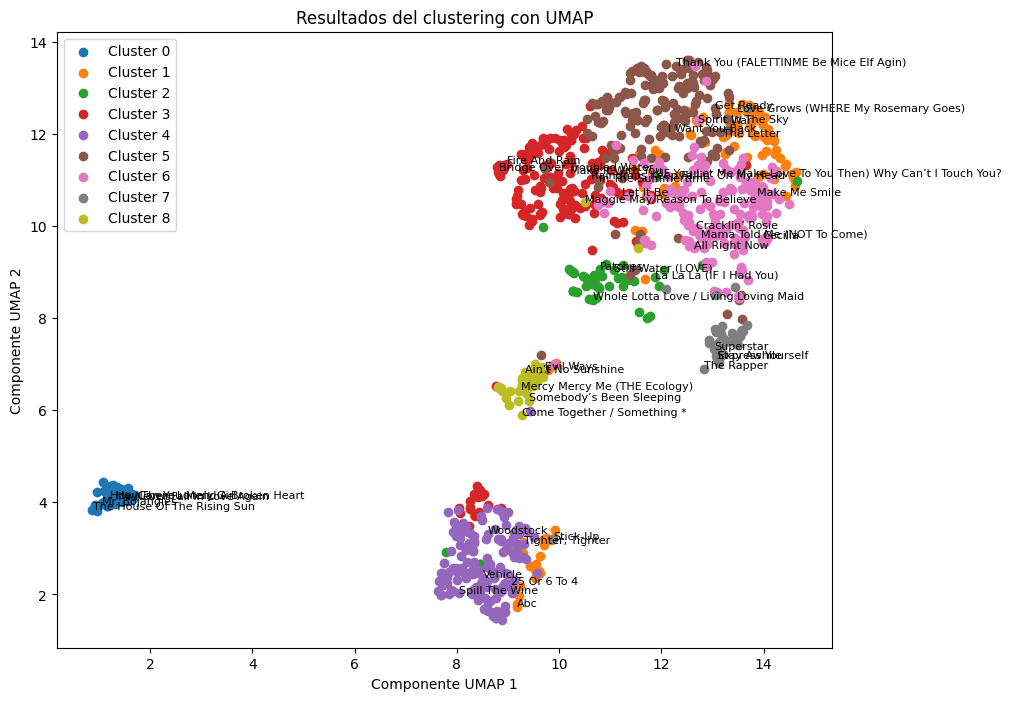

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

songs = ds_copy['Track'].copy()

umap_results= umap.UMAP(n_components=2).fit_transform(ds_precluster)

# Crear el DataFrame con los resultados de UMAP y los clusters
umap_df = pd.DataFrame({'x': umap_results[:, 0], 'y': umap_results[:, 1], 'Cluster': clusters_kmeans, 'Track': songs})

# Graficar los resultados de UMAP, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))

# Iterar sobre los clusters y plotear los puntos y etiquetas
for cluster_num in range(9):
    # Filtrar puntos del cluster actual
    cluster_points = umap_df[umap_df['Cluster'] == cluster_num]
    
    # Graficar los puntos del cluster
    plt.scatter(cluster_points['x'], cluster_points['y'], label=f'Cluster {cluster_num}')

    # Seleccionar hasta 5 canciones únicas para etiquetar
    songs_to_label = cluster_points['Track'].unique()[:5]

    # Agregar etiquetas de las canciones seleccionadas
    for song in songs_to_label:
        row = cluster_points[cluster_points['Track'] == song].iloc[0]  # Seleccionar solo la primera ocurrencia de cada canción
        plt.text(row['x'], row['y'], song, fontsize=8)

# Configuración del gráfico
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.title('Resultados del clustering con UMAP')
plt.legend()
plt.show()


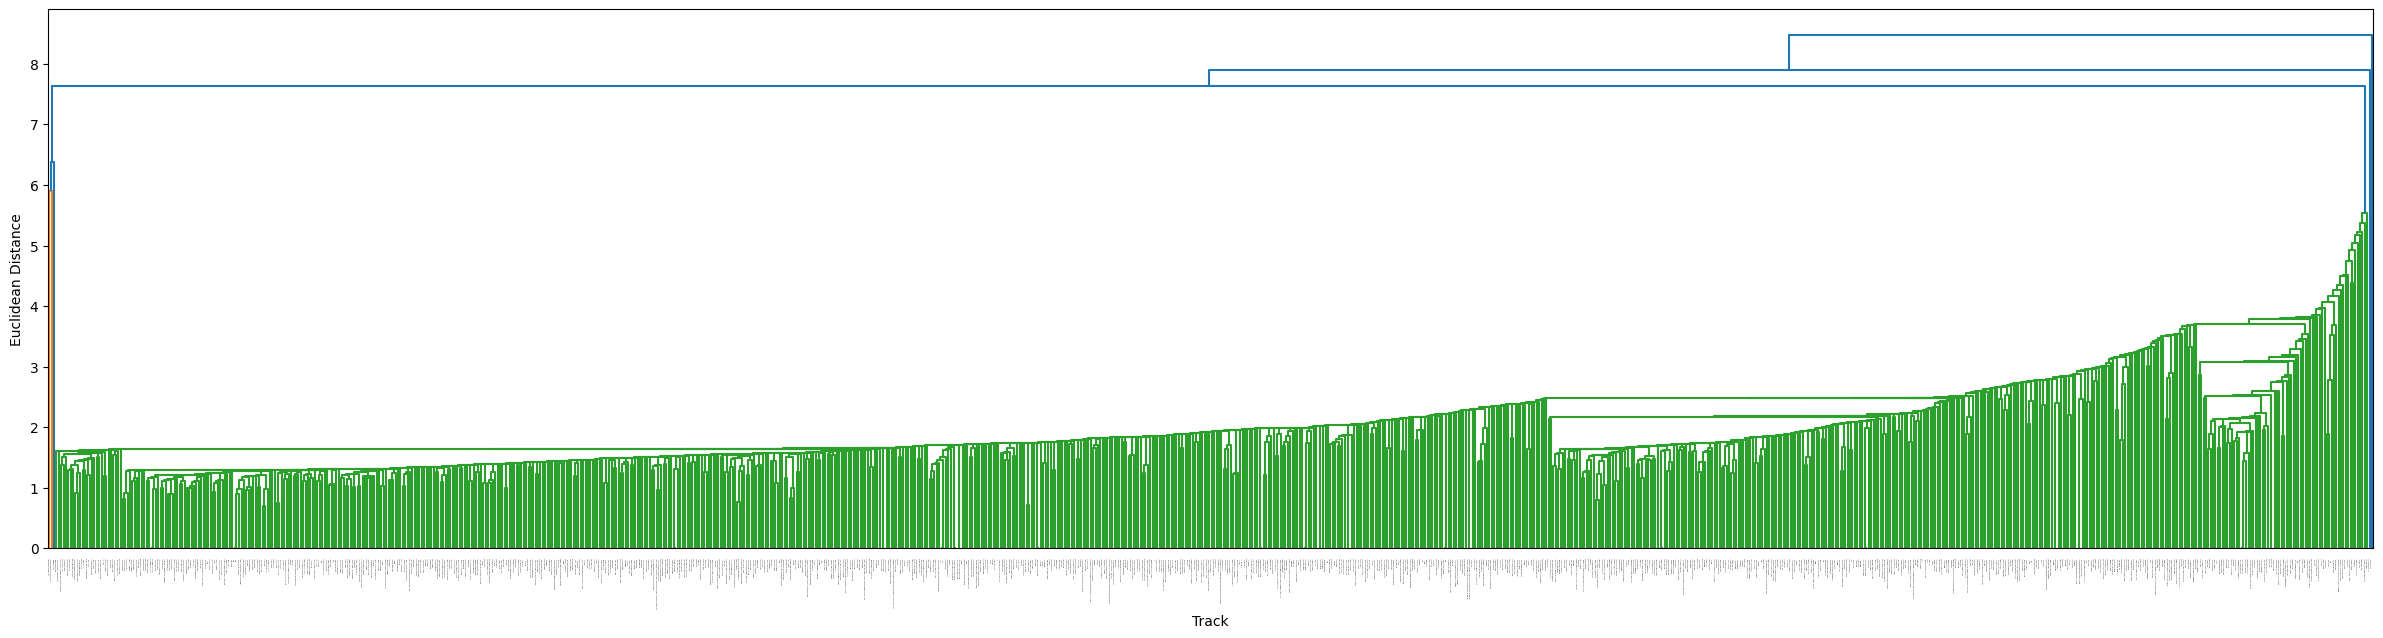

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
songs = ds_copy['Track'].copy()
# generamos el clustering jerárquico
linked = linkage(ds_precluster, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(30,7))
dendrogram(linked,
           orientation='top',
           labels=list(songs), # oko que hay que pasarle una lista
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=1)
plt.xlabel('Track')
plt.ylabel('Euclidean Distance')
plt.show()

-----------


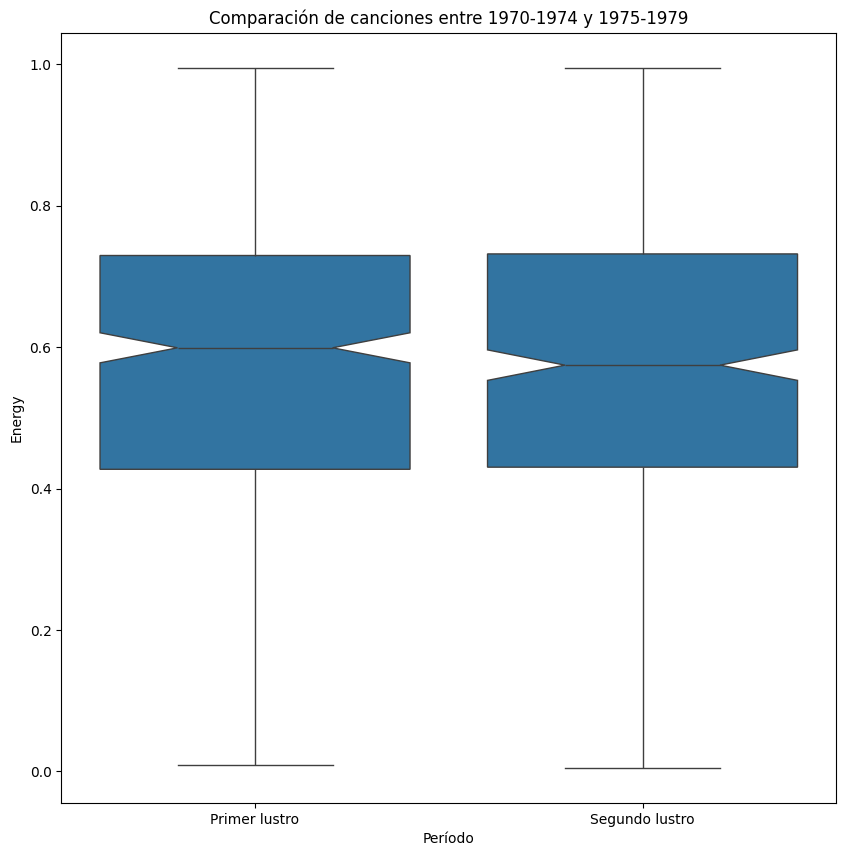

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

ds_anios = ds_filtred.copy()
ds_anios["Antes del 1975"] = ds_copy["Year"].between(1970, 1974)


ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Energy"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Energy"]



# Crear el gráfico boxplot para comparar Energy
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Energy', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Energy")

plt.show()


In [37]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.989, p-valor=0.001
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.988, p-valor=0.000


In [38]:
import scipy.stats as stats

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.001, p-valor=0.972


In [39]:
# Test de Mann-Whitney U para comparar la relación entre lustros y energy de las canciones
stat, p = stats.mannwhitneyu(ds_7074, ds_7579)
print(f"Test de Mann-Whitney U para comparar la relación entre lustros y energy de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Energy ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Energy ser divididas por lustro.")

Test de Mann-Whitney U para comparar la relación entre lustros y energy de las canciones: Estadístico=118854.500, p-valor=0.793
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones de la década del 1970 no tienen grandes diferencias en Energy ser divididas por lustro.


------------------------------------------------------------

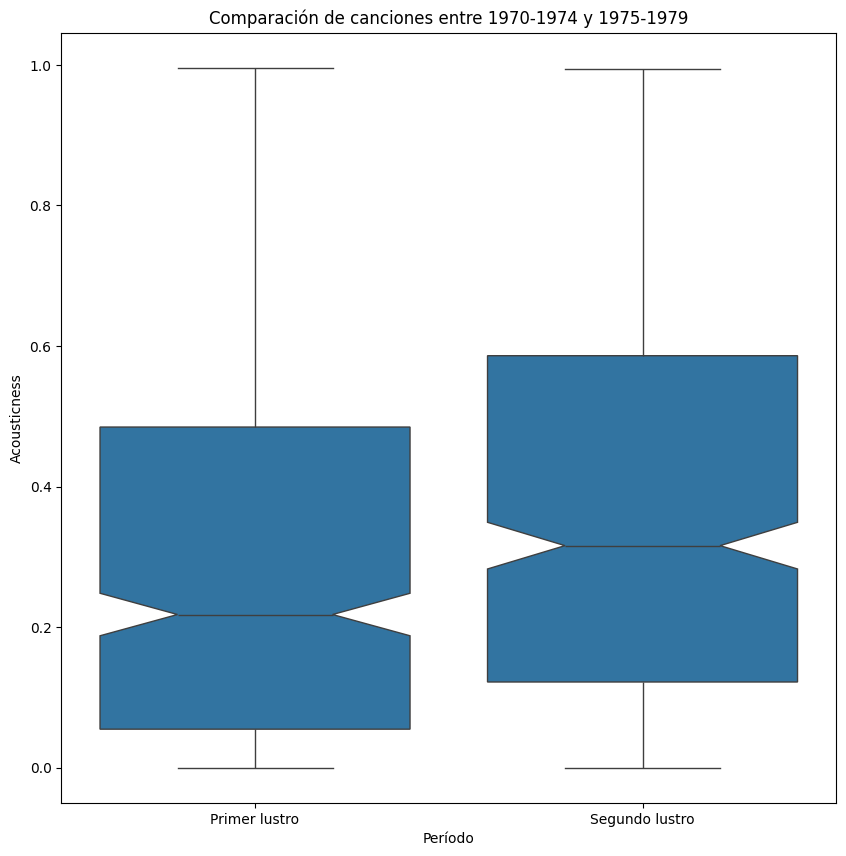

In [40]:
# Crear el gráfico boxplot para comparar Acousticness
ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Acousticness"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Acousticness"]

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Acousticness', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Acousticness")

plt.show()

In [41]:
# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.932, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.887, p-valor=0.000


In [42]:

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.609, p-valor=0.435


In [43]:
# Test de Mann-Whitney U para comparar la relación entre lustros y acousticness de las canciones
stat, p = stats.mannwhitneyu(ds_7074, ds_7579)
print(f"Test de Mann-Whitney U para comparar la relación entre lustros y acousticness de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Acousticness ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Acousticness ser divididas por lustro.")

Test de Mann-Whitney U para comparar la relación entre lustros y acousticness de las canciones: Estadístico=138150.500, p-valor=0.000
Se rechaza la hipótesis nula.
Las canciones de la década del 1970 tienen grandes diferencias en Acousticness ser divididas por lustro.


--------------------------------------------------

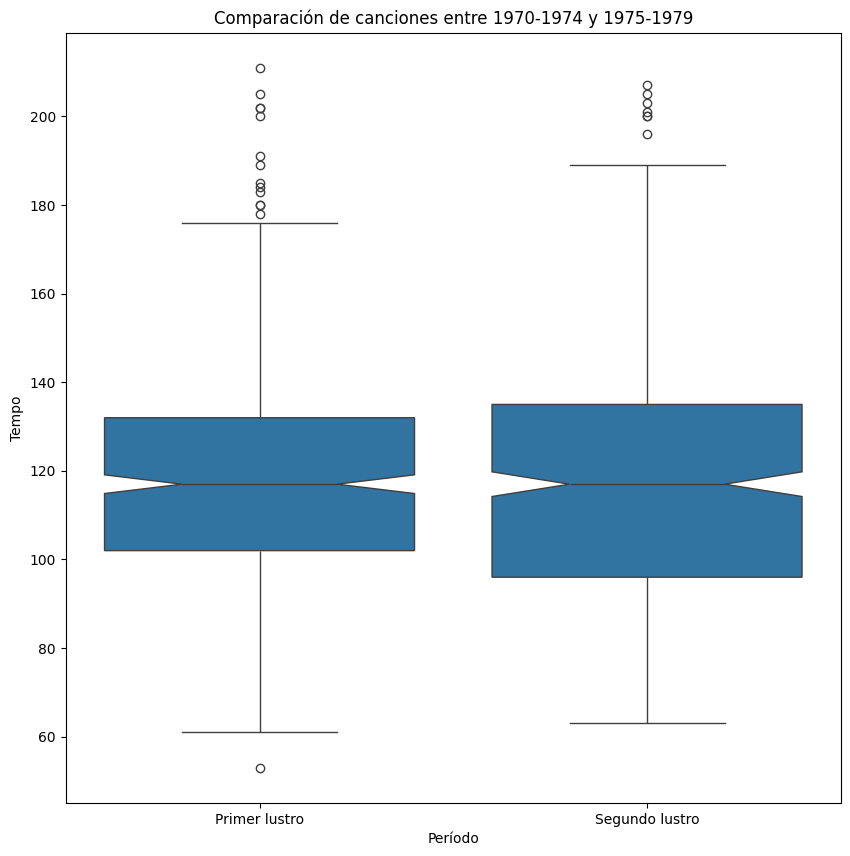

In [44]:
# Crear el gráfico boxplot para comparar Tempo
ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Tempo"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Tempo"]

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Tempo', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Tempo")

plt.show()

In [45]:
# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.973, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.975, p-valor=0.000


In [46]:

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=11.798, p-valor=0.001


In [47]:
# Test de Kruskal-Wallis para comparar la relación entre lustros y Tempo de las canciones
stat, p = stats.kruskal(ds_7074, ds_7579)
print(f"Test de Kruskal-Wallis para comparar la relación entre lustros y Tempo de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Tempo ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Tempo ser divididas por lustro.")

Test de Kruskal-Wallis para comparar la relación entre lustros y Tempo de las canciones: Estadístico=0.040, p-valor=0.841
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones de la década del 1970 no tienen grandes diferencias en Tempo ser divididas por lustro.


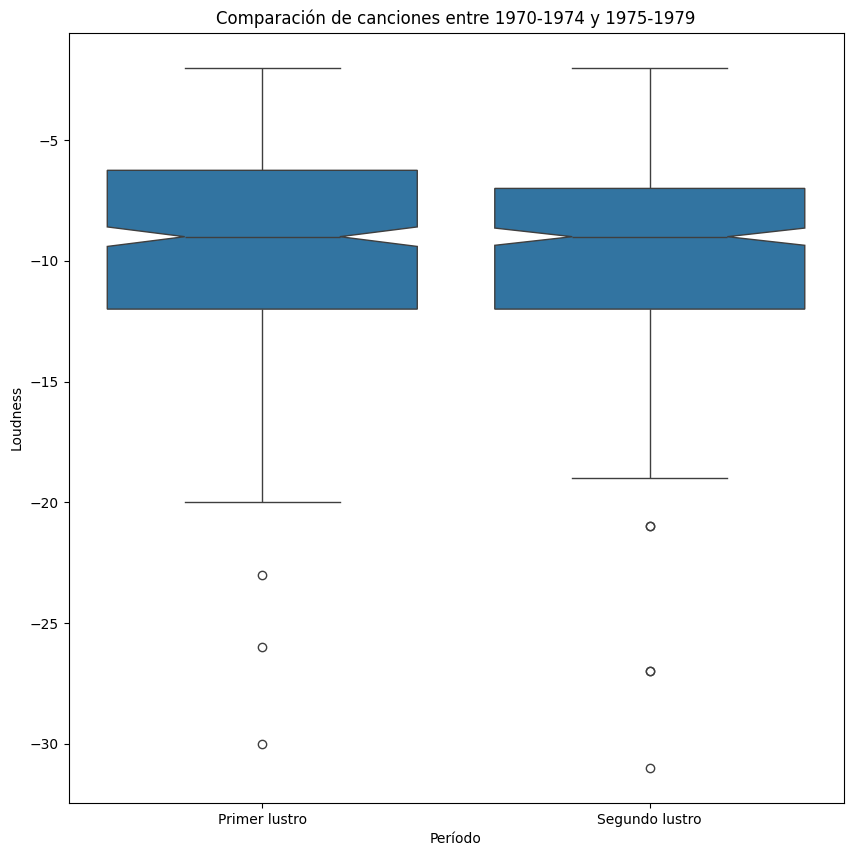

In [48]:
# Crear el gráfico boxplot para comparar Loudness
ds_7074 = ds_anios[ds_anios["Antes del 1975"] == 1]["Loudness"]
ds_7579 = ds_anios[ds_anios["Antes del 1975"] == 0]["Loudness"]

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Antes del 1975', y = 'Loudness', data=ds_anios, notch= True)
plt.title("Comparación de canciones entre 1970-1974 y 1975-1979")
plt.xticks(ticks=[0, 1], labels=["Primer lustro", "Segundo lustro"])
plt.xlabel("Período")
plt.ylabel("Loudness")

plt.show()

In [49]:
# Test de Shapiro-Wilk para canciones del primer lustro
stat, p = shapiro(ds_7074)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones del segundo lustro
stat, p = shapiro(ds_7579)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.949, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.947, p-valor=0.000


In [50]:

stat, p = stats.levene(ds_7074, ds_7579)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.503, p-valor=0.478


In [51]:
# Test de Mann-Whitney U para comparar la relación entre lustros y Loudness de las canciones
stat, p = stats.mannwhitneyu(ds_7074, ds_7579)
print(f"Test de Mann-Whitney U para comparar la relación entre lustros y Loudness de las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones de la década del 1970 no tienen grandes diferencias en Loudness ser divididas por lustro.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones de la década del 1970 tienen grandes diferencias en Loudness ser divididas por lustro.")

Test de Mann-Whitney U para comparar la relación entre lustros y Loudness de las canciones: Estadístico=113736.000, p-valor=0.155
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones de la década del 1970 no tienen grandes diferencias en Loudness ser divididas por lustro.


----


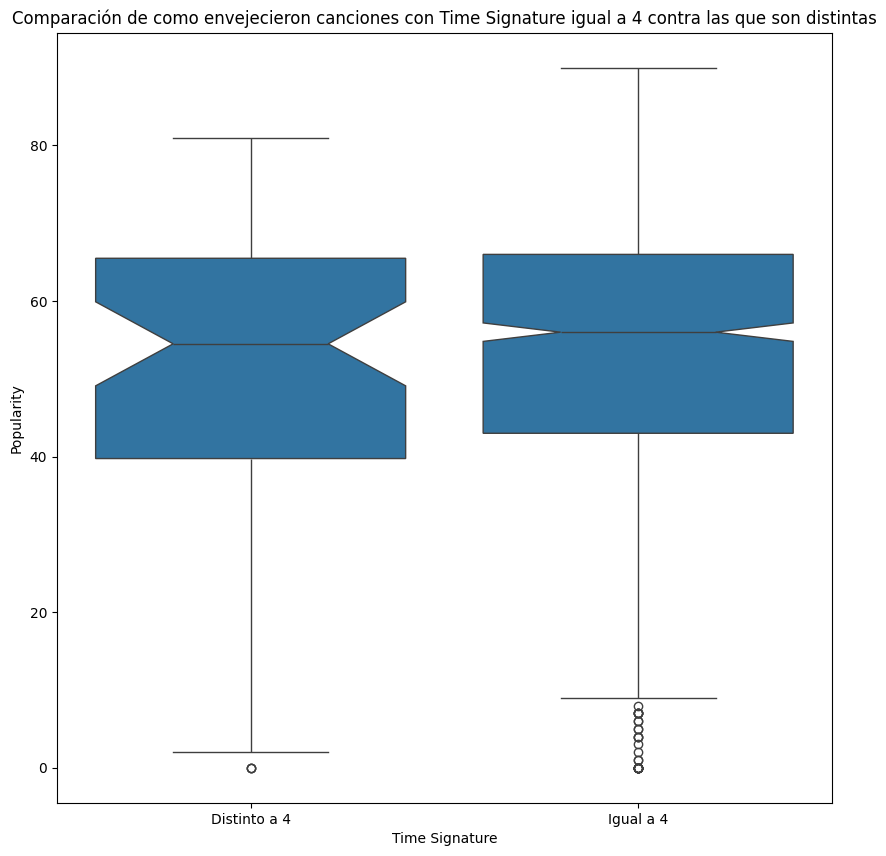

In [52]:
ds_ts = ds_copy.copy()

# Filtrar la popularidad para cada firma de tiempo
ds_ts_4 = ds_ts[ds_ts["Time_Signature"] == 4]["Popularity"]
ds_ts_n4 = ds_ts[ds_ts["Time_Signature"] != 4]["Popularity"]

ds_ts["TS4"] = np.where(ds_filtred["Time_Signature"] == 4, 1, 0)


plt.figure(figsize=(10, 10))
sns.boxplot(x = 'TS4', y = 'Popularity', data=ds_ts, notch= True)
plt.title("Comparación de como envejecieron canciones con Time Signature igual a 4 contra las que son distintas")
plt.xticks(ticks=[0, 1], labels=["Distinto a 4", "Igual a 4"])
plt.xlabel("Time Signature")
plt.ylabel("Popularity")

plt.show()

In [53]:
# Test de Shapiro-Wilk para canciones con time_signature igual a 4
stat, p = shapiro(ds_ts_4)
print(f"Test de Shapiro-Wilk para canciones del primer lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones time_signature igual a 3
stat, p = shapiro(ds_ts_n4)
print(f"Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para canciones del primer lustro: Estadístico=0.956, p-valor=0.000
Test de Shapiro-Wilk para canciones del segundo lustro: Estadístico=0.919, p-valor=0.001


In [ ]:

stat, p = stats.levene(ds_ts_4, ds_ts_n4)
print(f"Test de Levene para canciones de ambos lustros: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para canciones de ambos lustros: Estadístico=0.992, p-valor=0.319


In [ ]:
# Test de Mann-Whitney U para comparar la relación entre la popularidad actual de las canciones con respecto a su Time Signature
stat, p = stats.mannwhitneyu(ds_ts_4, ds_ts_n4)
print(f"Test de Mann-Whitney U para comparar la relación entre la popularidad actual de las canciones con respecto a su Time Signature: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones con Time Signature igual a 4 no son más populares a las demás.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones con Time Signature igual a 4 son más populares a las demás.")

Test de Mann-Whitney U para comparar la relación entre la popularidad actual de las canciones con respecto a su Time Signature: Estadístico=27247.000, p-valor=0.504
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones con Time Signature igual a 4 no son más populares a las demás.


---

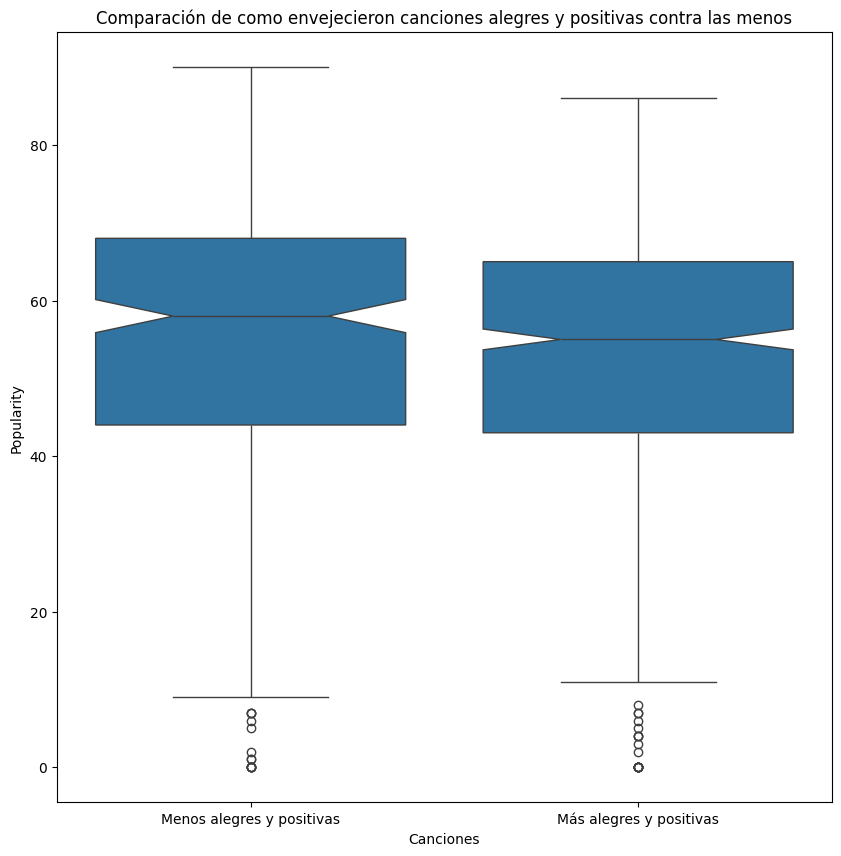

In [ ]:
ds_alegres = ds_copy.copy()

# Crear la columna "Bailable" en ds_bailables
ds_alegres["Alegres"] = ds_filtred["Valence"].between(0.5, 1)

# Filtrar la popularidad para canciones bailables y no bailables
ds_esAlegre = ds_alegres[ds_alegres["Alegres"] == 1]["Popularity"]
ds_noAlegre = ds_alegres[ds_alegres["Alegres"] == 0]["Popularity"]



plt.figure(figsize=(10, 10))
sns.boxplot(x = 'Alegres', y = 'Popularity', data=ds_alegres, notch= True)
plt.title("Comparación de como envejecieron canciones alegres y positivas contra las menos")
plt.xticks(ticks=[0, 1], labels=["Menos alegres y positivas", "Más alegres y positivas"])
plt.xlabel("Canciones")
plt.ylabel("Popularity")

plt.show()

In [ ]:
# Test de Shapiro-Wilk para canciones con time_signature igual a 4
stat, p = shapiro(ds_esAlegre)
print(f"Test de Shapiro-Wilk para las canciones más positivas y alegres: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para canciones time_signature igual a 3
stat, p = shapiro(ds_noAlegre)
print(f"Test de Shapiro-Wilk para las canciones menos positivas y alegres: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para las canciones más positivas y alegres: Estadístico=0.958, p-valor=0.000
Test de Shapiro-Wilk para las canciones menos positivas y alegres: Estadístico=0.940, p-valor=0.000


In [ ]:
stat, p = stats.levene(ds_esAlegre, ds_noAlegre)
print(f"Test de Levene entre canciones más bailables y menos bailables: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene entre canciones más bailables y menos bailables: Estadístico=2.821, p-valor=0.093

In [ ]:
# Test de Mann-Whitney U para comparar la relación entre la popularidad actual y que tan positivas y alegres son las canciones
stat, p = stats.mannwhitneyu(ds_esAlegre, ds_noAlegre)
print(f"Test de Mann-Whitney U para comparar la relación entre la popularidad actual y que tan positivas y alegres son las canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Las canciones más positivas y alegres no son más populares actualmente que las que no poseen esas características.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Las canciones más positivas y alegres son más populares actualmente que las que no poseen esas características.")

Test de Mann-Whitney U para comparar la relación entre la popularidad actual y que tan positivas y alegres son las canciones: Estadístico=96999.500, p-valor=0.074
No hay suficiente evidencia para rechazar la hipótesis nula.
Las canciones más positivas y alegres no son más populares actualmente que las que no poseen esas características.


---

C:\Users\tomyp\AppData\Local\Temp\ipykernel_15240\1226596873.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


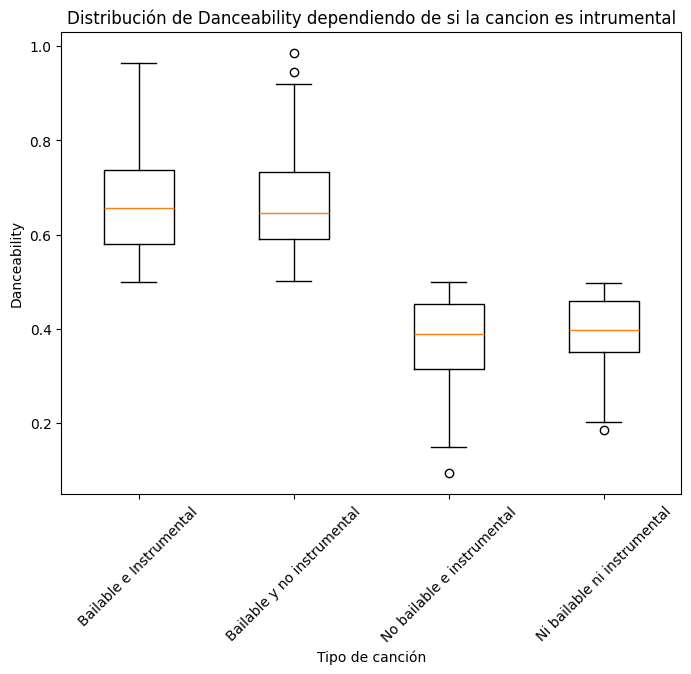

In [ ]:
ds_bailables = ds_filtred.copy()

# Crear la columna "Bailable" en ds_bailables
ds_bailables["Bailable"] = ds_filtred["Danceability"].between(0.5, 1)
ds_bailables["Instrumental"] = ds_filtred["Instrumentalness"] != 0

# Filtrar la popularidad para diferentes combinaciones de canciones bailables e instrumentales
ds_BaiIns = ds_bailables[(ds_bailables["Bailable"] == 1) & (ds_bailables["Instrumental"] == 1)].copy()
ds_Bai = ds_bailables[(ds_bailables["Bailable"] == 1) & (ds_bailables["Instrumental"] == 0)].copy()
ds_Ins = ds_bailables[(ds_bailables["Bailable"] == 0) & (ds_bailables["Instrumental"] == 1)].copy()
ds_NbaiNins = ds_bailables[(ds_bailables["Bailable"] == 0) & (ds_bailables["Instrumental"] == 0)].copy()


# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(
    [ds_BaiIns["Danceability"], ds_Bai["Danceability"], ds_Ins["Danceability"], ds_NbaiNins["Danceability"]],
    labels=["Bailable e Instrumental", "Bailable y no instrumental", "No bailable e instrumental", "Ni bailable ni instrumental"]
)
#labels=["Bailable e Instrumental", "Bailable y no instrumental", "No bailable e instrumental", "Ni bailable ni instrumental"]
# Agregar etiquetas a los ejes
plt.xlabel("Tipo de canción")
plt.ylabel("Danceability")
plt.xticks(rotation=45, fontsize=10)
# Agregar un título al gráfico
plt.title("Distribución de Danceability dependiendo de si la cancion es intrumental")

# Mostrar el gráfico
plt.show()




In [ ]:
from scipy.stats import chi2_contingency
contingency_table = [
    [len(ds_BaiIns), len(ds_Bai)],
    [len(ds_Ins), len(ds_NbaiNins)]
]

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(expected)

Chi-cuadrado: 3.354961527129019
P-valor: 0.06700277644591061
Grados de libertad: 1
Frecuencias esperadas:
[[507.06632653 207.93367347]
 [187.93367347  77.06632653]]


In [ ]:
from scipy.stats import chi2_contingency


# Crear tabla de contingencia 2x2
tabla_contingencia = pd.DataFrame(
    [[len(ds_BaiIns), len(ds_Bai)],    # Bailables
     [len(ds_Ins), len(ds_NbaiNins)]], # No Bailables
    columns=["Instrumental", "No Instrumental"],
    index=["Bailable", "No Bailable"]
)

print("Tabla de contingencia:")
print(tabla_contingencia)

# Aplicar test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")  
print("Frecuencias esperadas:")
print(expected)


Tabla de contingencia:
             Instrumental  No Instrumental
Bailable              495              220
No Bailable           200               65
Chi-cuadrado: 3.354961527129019
p-valor: 0.06700277644591061
Grados de libertad: 1
Frecuencias esperadas:
[[507.06632653 207.93367347]
 [187.93367347  77.06632653]]
